In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import xgboost as xgb

In [4]:
from google.colab import files
data_to_load = files.upload()

Saving test_semejanzas.csv to test_semejanzas.csv
Saving train_semejanzas.csv to train_semejanzas.csv
Saving test_8_features.csv to test_8_features.csv
Saving train_8_features.csv to train_8_features.csv


In [5]:
train = pd.read_csv('train_8_features.csv')
test = pd.read_csv('test_8_features.csv')

In [6]:
train2 = pd.read_csv('train_semejanzas.csv')
test2 = pd.read_csv('test_semejanzas.csv')

In [7]:
train.head()

,target,longitud_text,cantidad_palabras,keyword_mean,location_mean,numerales,cant_palabras_relevantes,long_palabra_larga,long_palabra_corta
0,1,69,13,0.688525,0.424398,1,8,9,2
1,1,38,7,0.688525,0.424398,0,7,6,2
2,1,133,22,0.688525,0.424398,0,13,7,2
3,1,65,8,0.688525,0.424398,1,8,10,2
4,1,88,16,0.688525,0.424398,2,10,7,3


In [8]:
train2.head()

,target,semejanza,diferencia,simil_intruso
0,1,0.817225,0.698188,0.515924
1,1,0.650956,0.585544,0.430637
2,1,0.837994,0.785140,0.503261
3,1,0.798241,0.705008,0.432212
4,1,0.786582,0.727637,0.378606


In [9]:
train['sim'] = train2['semejanza']
train['dif'] = train2['diferencia']
train['intruso'] = train2['simil_intruso']
train.head()

,target,longitud_text,cantidad_palabras,keyword_mean,location_mean,numerales,cant_palabras_relevantes,long_palabra_larga,long_palabra_corta,sim,dif,intruso
0,1,69,13,0.688525,0.424398,1,8,9,2,0.817225,0.698188,0.515924
1,1,38,7,0.688525,0.424398,0,7,6,2,0.650956,0.585544,0.430637
2,1,133,22,0.688525,0.424398,0,13,7,2,0.837994,0.785140,0.503261
3,1,65,8,0.688525,0.424398,1,8,10,2,0.798241,0.705008,0.432212
4,1,88,16,0.688525,0.424398,2,10,7,3,0.786582,0.727637,0.378606


In [10]:
test['sim'] = test2['semejanza']
test['dif'] = test2['diferencia']
test['intruso'] = test2['simil_intruso']

In [11]:
test.head()

,id,longitud_text,cantidad_palabras,keyword_mean,location_mean,numerales,cant_palabras_relevantes,long_palabra_larga,long_palabra_corta,sim,dif,intruso
0,0,34,6,0.688525,0.424398,0,5,7,3,0.785297,0.652014,0.418288
1,2,64,9,0.688525,0.424398,1,7,9,4,0.845440,0.719810,0.513763
2,3,96,19,0.688525,0.424398,0,11,6,1,0.816374,0.755508,0.347620
3,9,40,4,0.688525,0.424398,2,4,9,5,0.622187,0.484174,0.071788
4,11,45,8,0.688525,0.424398,0,6,8,2,0.673268,0.535773,0.259028


In [12]:
X, y = train.drop(['target'], axis=1), train['target']

In [22]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=123)

In [23]:
xg_cls = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 4, alpha = 10, n_estimators = 100)

In [24]:
xg_cls.fit(X_train,y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [25]:
preds = xg_cls.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, preds)
trues = accuracy_score(y_test, preds, normalize=False)
print("Accuracy: %f" % (accuracy))
print("Acertados %i de %i" % (trues,preds.size))

Accuracy: 0.875903
Acertados 1334 de 1523


In [27]:
xg_cls = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_cls.fit(X_train,y_train)
preds = xg_cls.predict(X_test)
accuracy = accuracy_score(y_test, preds)
trues = accuracy_score(y_test, preds, normalize=False)
print("Accuracy: %f" % (accuracy))
print("Acertados %i de %i" %(trues,preds.size))

Accuracy: 0.871307
Acertados 1327 de 1523


In [28]:
xg_cls = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 100)
xg_cls.fit(X_train,y_train)
preds = xg_cls.predict(X_test)
accuracy = accuracy_score(y_test, preds)
trues = accuracy_score(y_test, preds, normalize=False)
print("Accuracy: %f" % (accuracy))
print("Acertados %i de %i" %(trues,preds.size))

Accuracy: 0.880499
Acertados 1341 de 1523


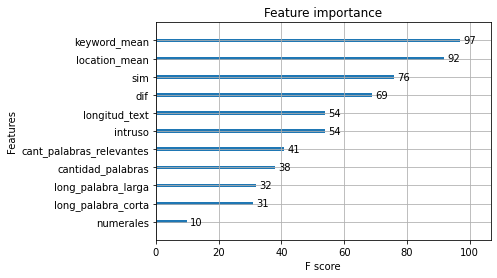

In [30]:
xgb.plot_importance(xg_cls)

In [31]:
xg_cls = xgb.XGBClassifier(objective ='binary:logistic', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 100)
xg_cls.fit(X,y)
preds = xg_cls.predict(test.drop(['id'], axis=1))

In [33]:
preds.shape

(3263,)

In [34]:
target = pd.DataFrame({'id':test['id'], 'target':preds})
target.to_csv('submit_xgboost_1.csv', index=False)

In [35]:
target.head()

,id,target
0,0,0
1,2,0
2,3,1
3,9,0
4,11,1
